# DLProfile Example using mmaADSP Benchmark

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

#### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:

DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/cosmoflow/cosmo_run2_p128.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

[============================================================] 100.0% 16744207 of 16744207 Parsing DXT File 
[============================================================] 100.0% 95498 of 95498 Parsing Darshan File 
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [7]:
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1640.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1768.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1512.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1128.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-re

 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1212.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1084.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1724.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1981.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1725.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1341.tfrecords',
 '/lus/theta-fs0/projects/ML

In [8]:
df_normal = profile.GetTraceAsDF()
pp.pprint("Files used in the application")
pp.pprint(df_normal['Filename'].unique().tolist())

'Files used in the application'
['/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1640.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000.tfrecords',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1256.tfrecords',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-003.h5',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1128.tfrecords',
 '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/checkpoint-004.h5',
 '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec189

### Collect the summary of the Application

In [9]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']/8))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])/8*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.1f} GB".format(32))
print("\tMin,Max\t\t\t:\t{:0.1f} GB and {:0.1f} GB".format(2,2))
print("\tAverage\t\t\t:\t{:0.1f} GB".format(2))



Data Access Summary (from Darshan):
Total Job time			:	642.00 seconds
Time spent in I/O		:	5.79 seconds
% Time spent in I/O		:	0.90%
Total Data Accessed		:	8192.03 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read' 'write']
# of files used			:	1026
# of MPI Ranks			:	128 ranks
Data Transfer size:
	Min,Max			:	0 bytes and 262144 bytes
	Average			:	262090 bytes
	Median			:	262144 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	0 B/s and 2500 MB/s
	Average			:	1757 MB/s
	Median			:	1250 MB/s
Access Pattern:
	Sequential		:	99.99%
	Consecutive		:	99.99%


Files Summary:
File Types			:	['yaml' 'pkl' 'tfrecords']
Dataset Size:
	Total			:	32.0 GB
	Min,Max			:	2.0 GB and 2.0 GB
	Average			:	2.0 GB


In [10]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 642.0 seconds'


In [11]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()/8))

'Time spent by application on I/O: 5.786576564001266 seconds'


### I/O time spent on each file

In [12]:
for file in df['Filename'].unique()[:16]:
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml: 0.01 seconds
I/O time for file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl: 0.00 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1640.tfrecords: 5.27 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1768.tfrecords: 5.18 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1512.tfrecords: 5.94 seconds
I/O time for file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1128.tfrecords: 6.15 seconds
I/O time

### I/O Time spent per rank

In [13]:
for rank in df['Rank'].unique()[:16]:
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank 0: 46.98 seconds
I/O time for rank 1: 45.93 seconds
I/O time for rank 2: 45.61 seconds
I/O time for rank 3: 46.12 seconds
I/O time for rank 4: 46.69 seconds
I/O time for rank 5: 46.95 seconds
I/O time for rank 6: 46.61 seconds
I/O time for rank 7: 45.85 seconds
I/O time for rank 8: 45.39 seconds
I/O time for rank 9: 45.81 seconds
I/O time for rank 10: 45.15 seconds
I/O time for rank 11: 46.40 seconds
I/O time for rank 12: 45.24 seconds
I/O time for rank 13: 47.00 seconds
I/O time for rank 14: 46.37 seconds
I/O time for rank 15: 46.38 seconds


In [14]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 8192.03 GB'

### I/O performed on each file

In [15]:
for file in df['Filename'].unique()[:16]:
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml: 0.07 MB
I/O performed on file /home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl: 0.00 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1640.tfrecords: 8192.03 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1768.tfrecords: 8192.03 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1512.tfrecords: 8192.03 MB
I/O performed on file /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1128.tfrecords: 8192.03 MB
I/

In [16]:
for rank in df['Rank'].unique()[:16]:
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank 0: 32654.56 MB
I/O performed by rank 1: 32671.31 MB
I/O performed by rank 2: 32671.31 MB
I/O performed by rank 3: 32671.31 MB
I/O performed by rank 4: 32671.31 MB
I/O performed by rank 5: 32671.31 MB
I/O performed by rank 6: 32671.31 MB
I/O performed by rank 7: 32671.31 MB
I/O performed by rank 8: 32671.31 MB
I/O performed by rank 9: 32671.31 MB
I/O performed by rank 10: 32671.31 MB
I/O performed by rank 11: 32671.31 MB
I/O performed by rank 12: 32671.31 MB
I/O performed by rank 13: 32671.31 MB
I/O performed by rank 14: 32671.31 MB
I/O performed by rank 15: 32671.31 MB


In [17]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'checkpoint-001': 961184.0,
 'checkpoint-002': 961184.0,
 'checkpoint-003': 961184.0,
 'checkpoint-004': 961184.0,
 'config': 715.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1000': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1001': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1002': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1004': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1005': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1006': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1007': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1008': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1009': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1010': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1011': 2147490944.0,
 '

 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1954': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1955': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1956': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1957': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1958': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1959': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1960': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1961': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1962': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1963': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1964': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1965': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1966': 2147490944.0,
 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1967': 2147490944.0,
 'cosmoUniverse_2019

In [18]:
file="/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords"
!ls -l $file

-rw-r----- 1 memani MLPerfHPC 2147490944 Feb 12  2019 /lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1003.tfrecords


### How application access data over time.

[============================================================] 100.0% 16731070 of 16731070 Creating Timeline 


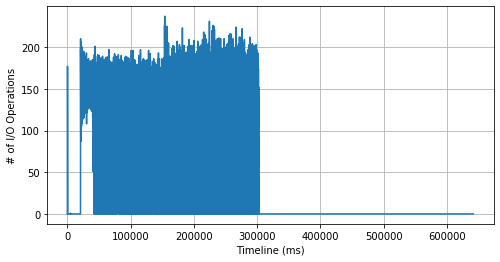

In [19]:
tl = profile.CreateIOTimeline(time_step=0.001)
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("# of I/O Operations")
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

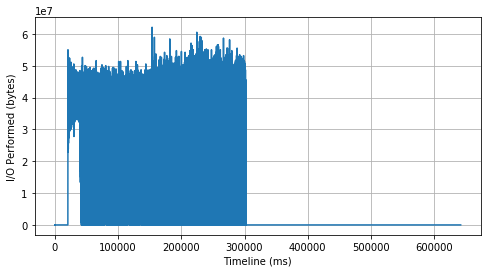

In [20]:
plt.figure(figsize=(8,4))
plt.xlabel("Timeline (ms)")
plt.ylabel("I/O Performed (bytes)")
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

[============================================================] 100.0% 384 of 384 Creating Timeline 


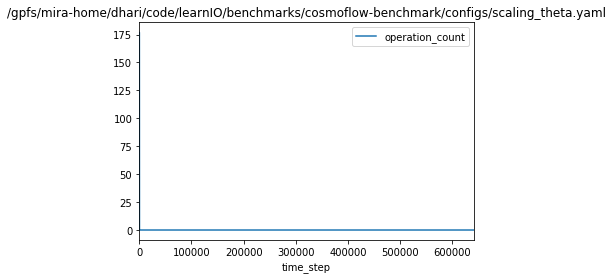


[============================================================] 100.0% 1 of 1 Creating Timeline 


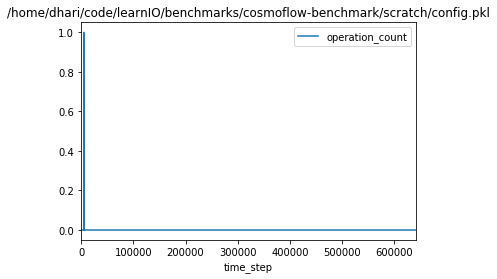

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


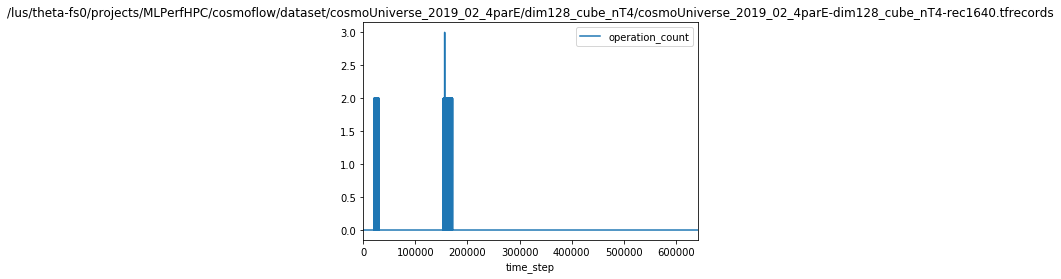

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


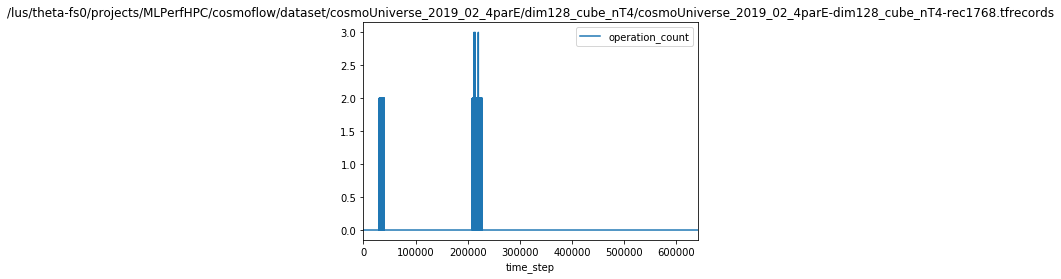

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


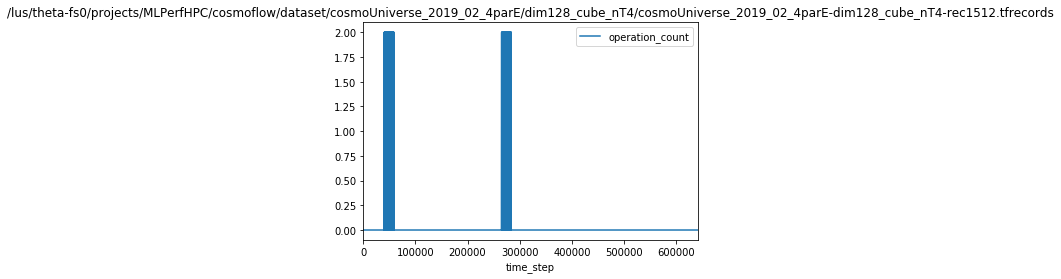

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


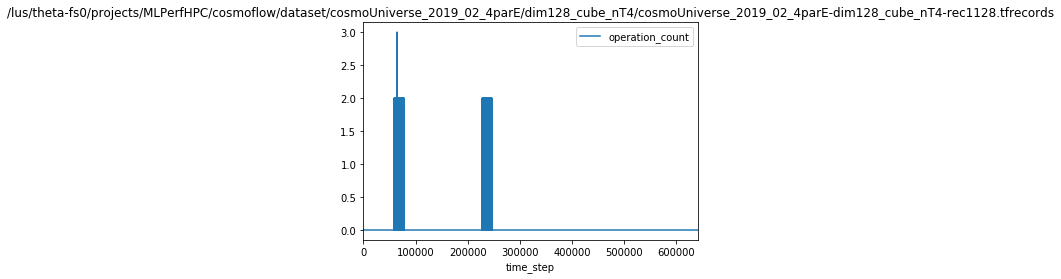

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


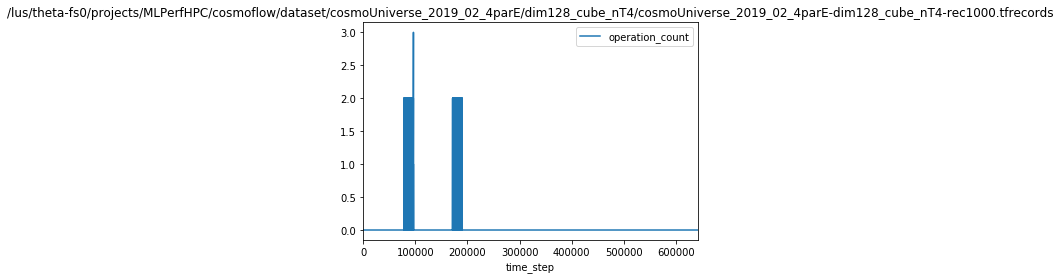

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


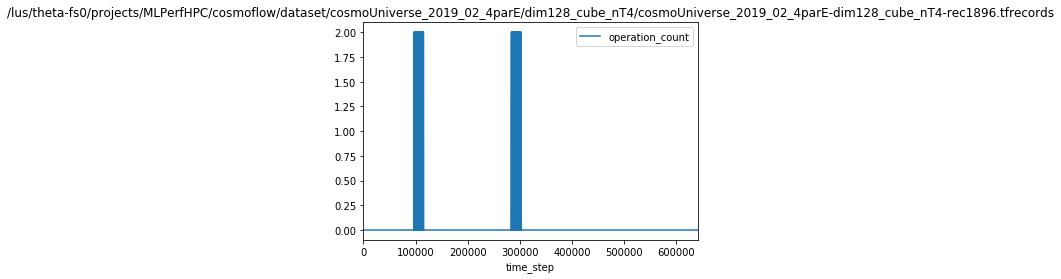

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


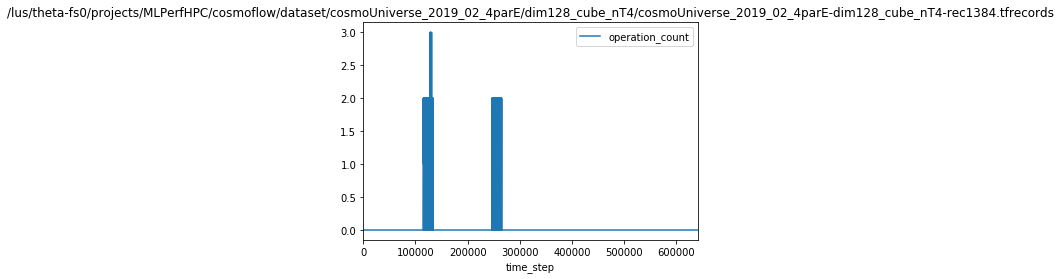

[============================================================] 100.0% 15954 of 15954 Creating Timeline 


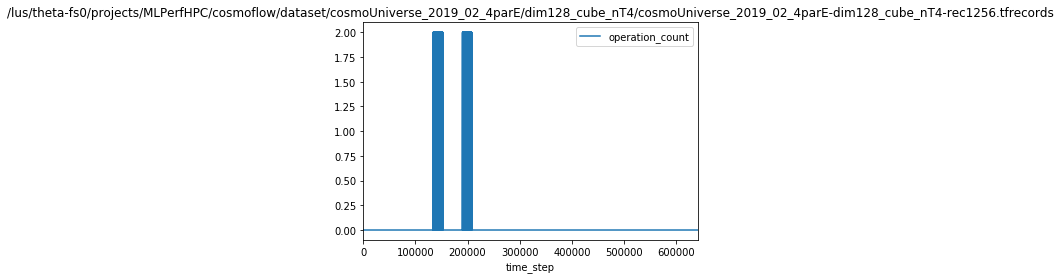

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


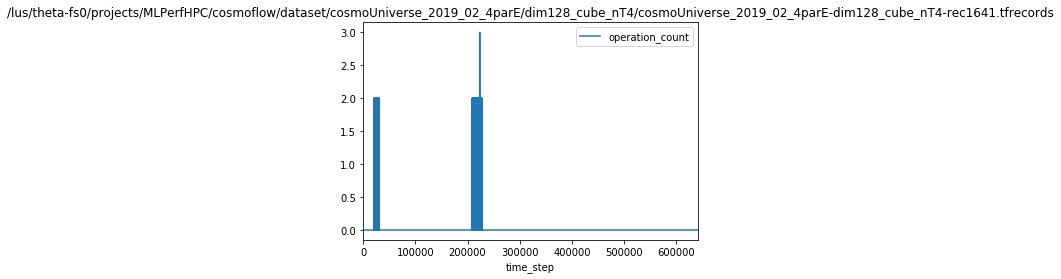

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


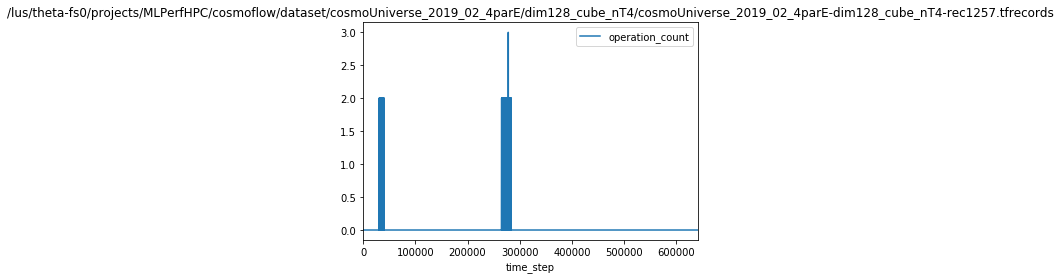

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


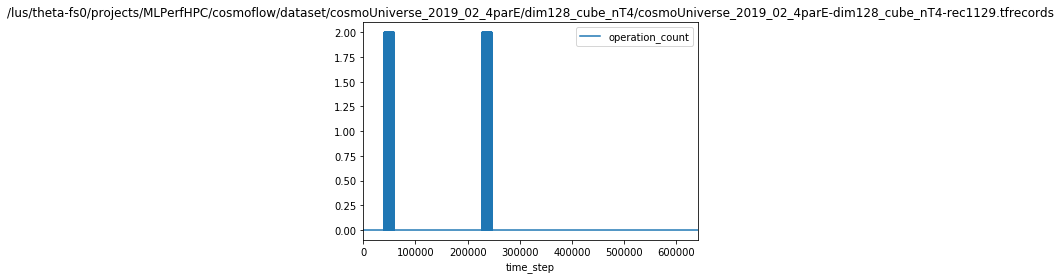

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


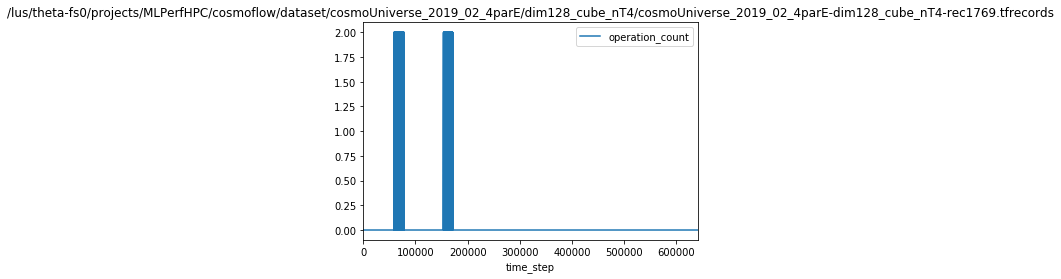

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


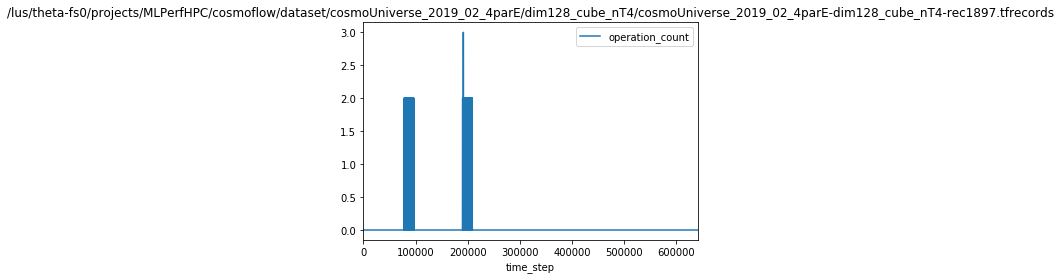

[============================================================] 100.0% 16384 of 16384 Creating Timeline 


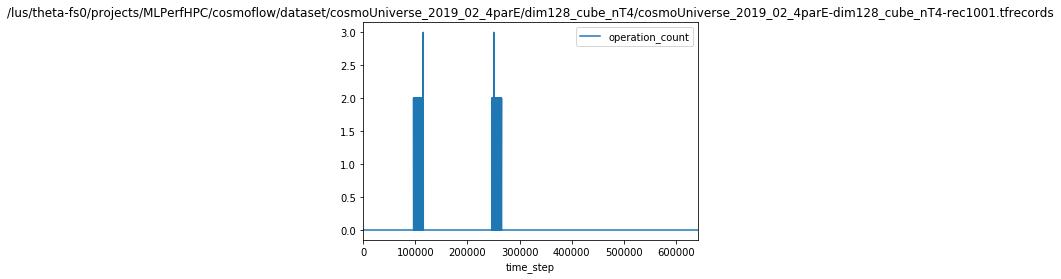

In [21]:
for file in df['Filename'].unique()[:16]:
    tl = profile.CreateIOTimeline(filepath=file,time_step=0.001)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 130646 of 130646 Creating Timeline 


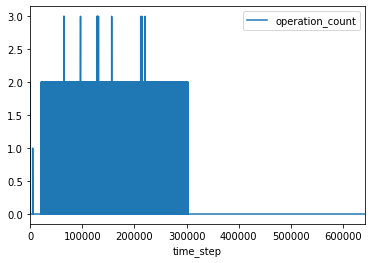

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


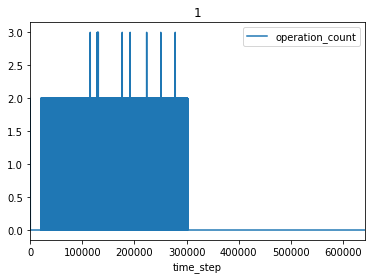

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


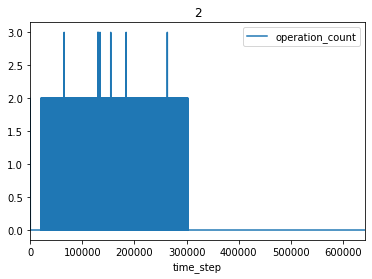

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


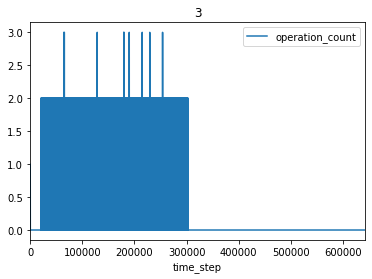

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


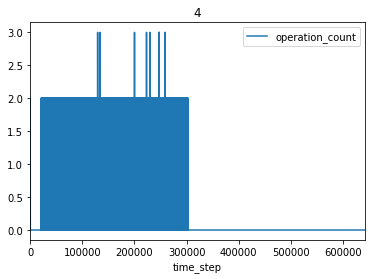

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


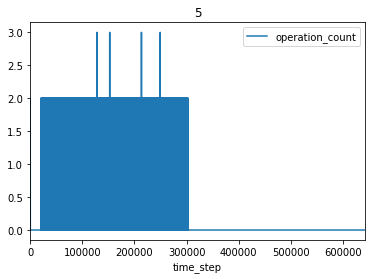

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


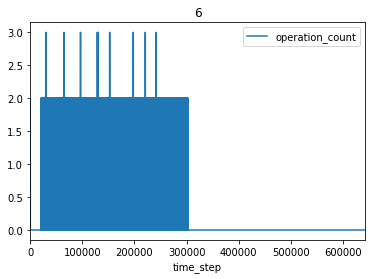

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


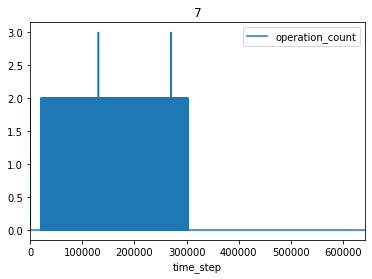

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


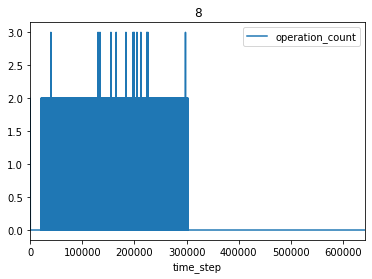

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


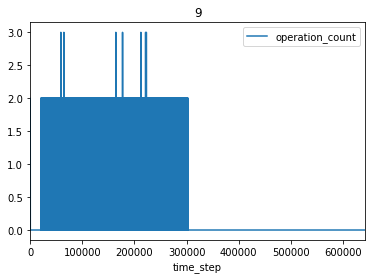

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


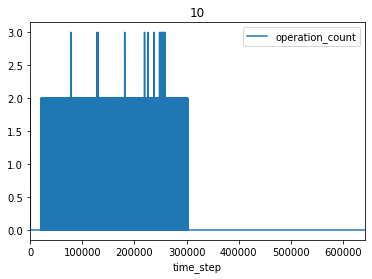

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


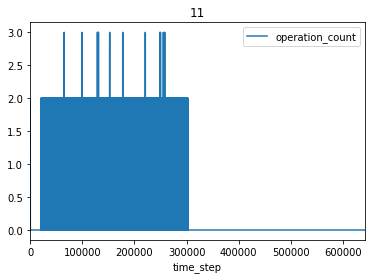

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


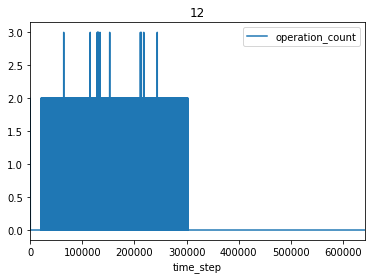

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


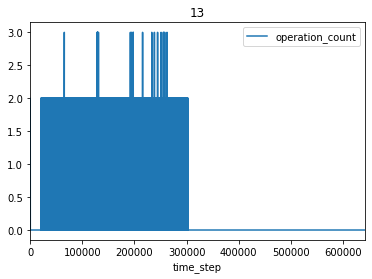

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


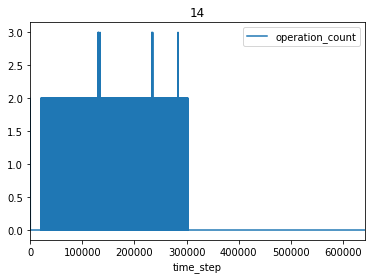

[============================================================] 100.0% 130712 of 130712 Creating Timeline 


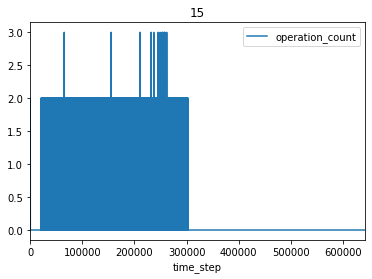

In [22]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.CreateIOTimeline(rank=rank, time_step = 0.001)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

Text(0.5, 0, 'Transfer Size (bytes)')

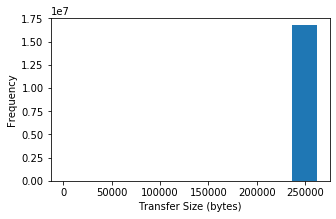

In [23]:
request_df = profile.GetIORequestDistribution()
df['Length'].plot(kind='hist', figsize=(5, 3));
plt.xlabel("Transfer Size (bytes)")

### Data Transfer Size distribution for each file.

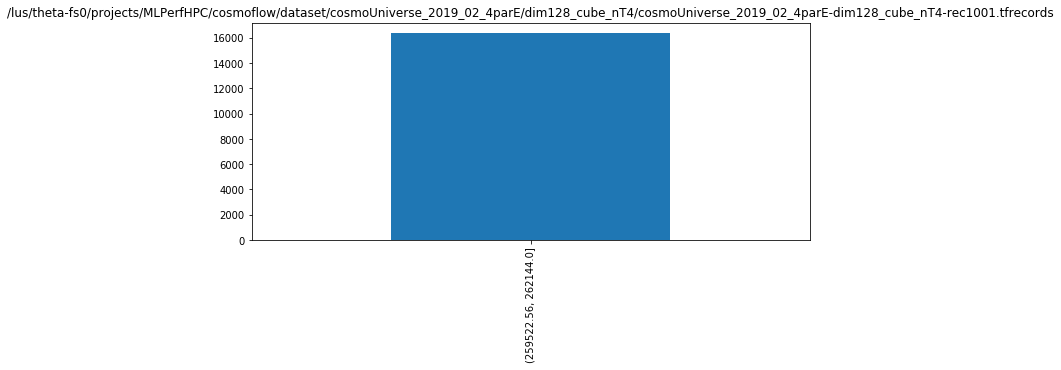

In [24]:
for file in df['Filename'].unique()[:16]:
    tl = profile.GetIORequestDistribution(filepath=file)
    tl.plot(kind='bar', figsize=(10, 4), title=file)

### Data Transfer Sizes per Rank

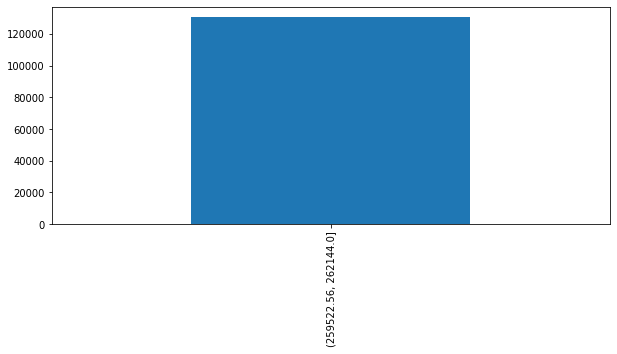

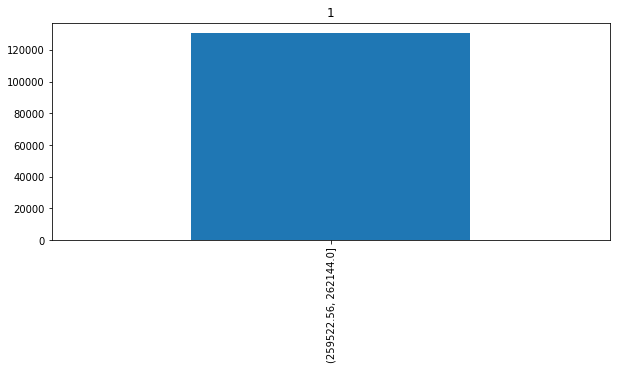

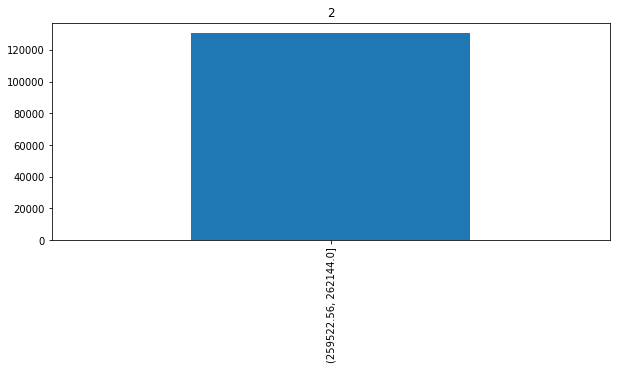

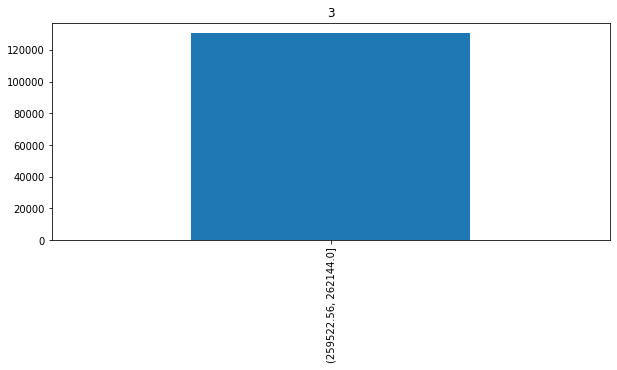

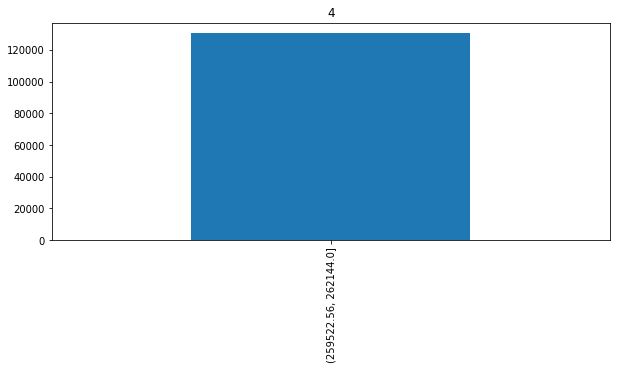

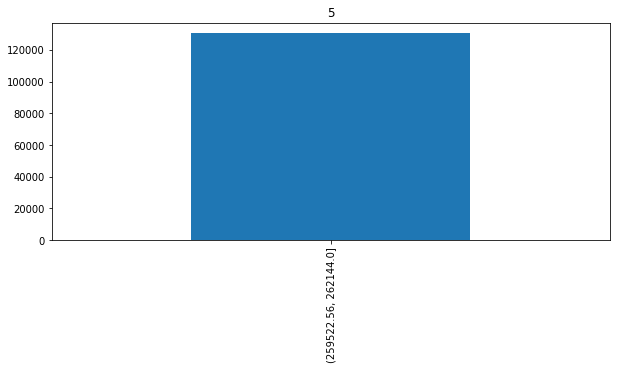

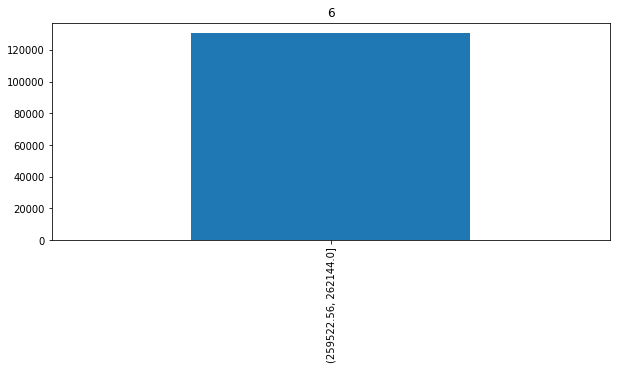

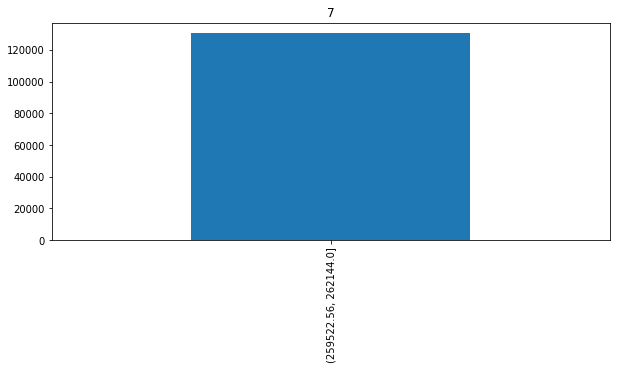

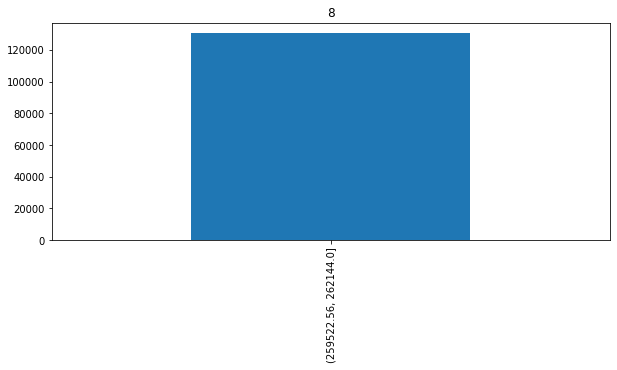

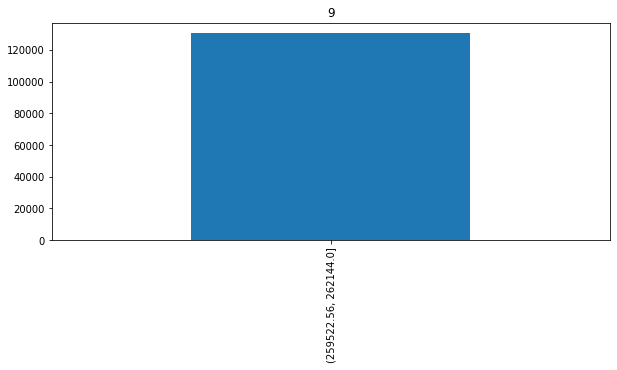

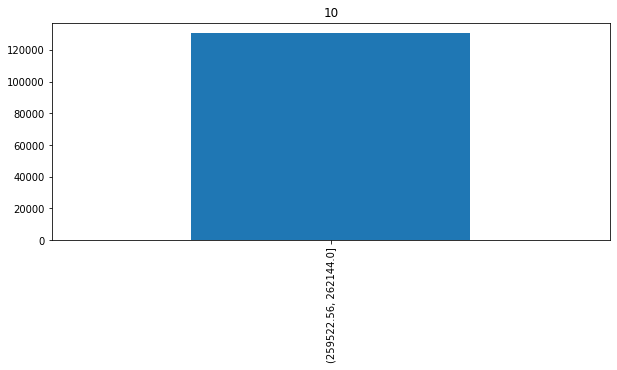

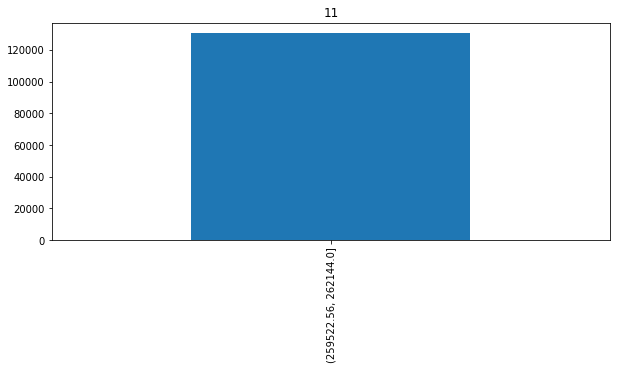

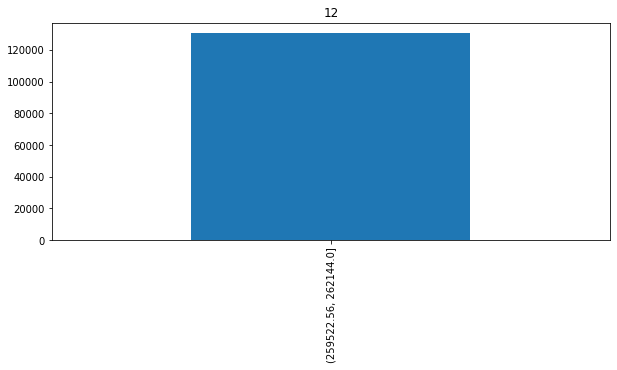

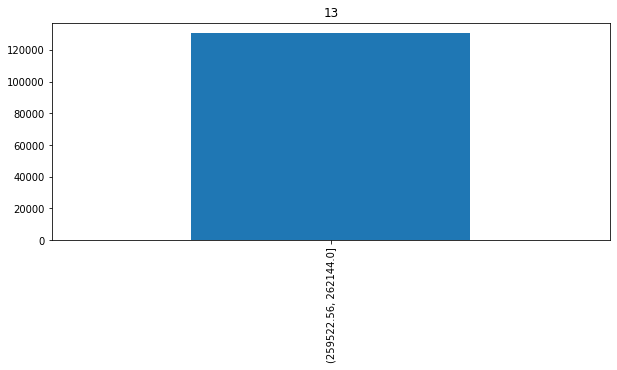

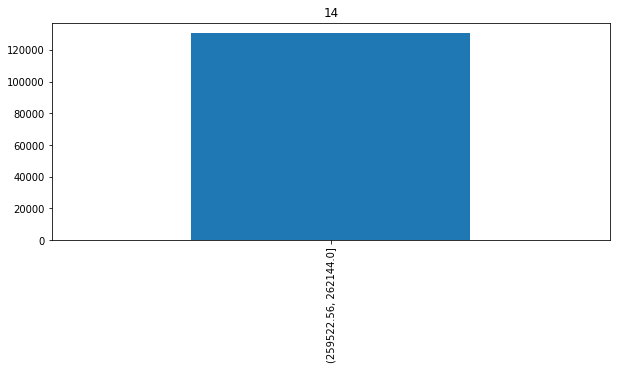

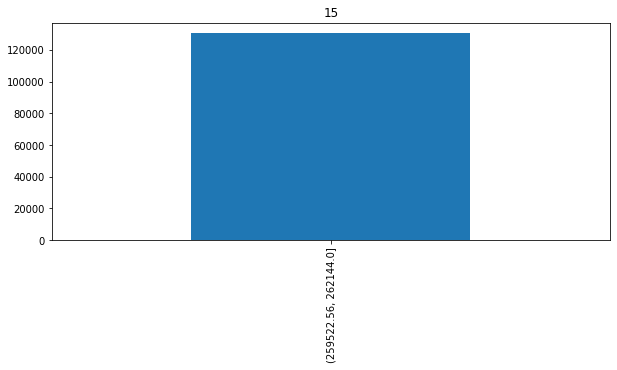

In [25]:
for rank in df['Rank'].unique()[:16]:
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [26]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique()[:16]:
    if os.path.exists(file):
        pp.pprint(profile.GetFileSummary(file))

{'ext': 'yaml',
 'filename': 'scaling_theta',
 'io_size': 76032,
 'io_time': 0.013496874999999969,
 'path': '/gpfs/mira-home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/configs/scaling_theta.yaml',
 'size': 594,
 'special': {}}
{'ext': 'pkl',
 'filename': 'config',
 'io_size': 715,
 'io_time': 0.001300000000000523,
 'path': '/home/dhari/code/learnIO/benchmarks/cosmoflow-benchmark/scratch/config.pkl',
 'size': 715,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1640',
 'io_size': 8589963776,
 'io_time': 5.266399999999727,
 'path': '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/cosmoUniverse_2019_02_4parE/dim128_cube_nT4/cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1640.tfrecords',
 'size': 2147490944,
 'special': {}}
{'ext': 'tfrecords',
 'filename': 'cosmoUniverse_2019_02_4parE-dim128_cube_nT4-rec1768',
 'io_size': 8589963776,
 'io_time': 5.1795999999991365,
 'path': '/lus/theta-fs0/projects/MLPerfHPC/cosmoflow/dataset/co